# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 34285 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all)


  0% (    1 of 34285) |            | Elapsed Time: 0:00:03 ETA:  1 day, 11:48:48

  0% (  114 of 34285) |                    | Elapsed Time: 0:00:04 ETA:  0:05:01

  0% (  224 of 34285) |                    | Elapsed Time: 0:00:05 ETA:  0:05:03

  0% (  335 of 34285) |                    | Elapsed Time: 0:00:06 ETA:  0:05:03

  1% (  429 of 34285) |                    | Elapsed Time: 0:00:07 ETA:  0:05:04

  1% (  542 of 34285) |                    | Elapsed Time: 0:00:08 ETA:  0:05:01

  1% (  656 of 34285) |                    | Elapsed Time: 0:00:09 ETA:  0:04:59

  2% (  773 of 34285) |                    | Elapsed Time: 0:00:10 ETA:  0:04:56

  2% (  858 of 34285) |                    | Elapsed Time: 0:00:11 ETA:  0:04:53

  2% (  967 of 34285) |                    | Elapsed Time: 0:00:12 ETA:  0:04:53

  3% ( 1069 of 34285) |                    | Elapsed Time: 0:00:13 ETA:  0:05:00

  3% ( 1184 of 34285) |                    | Elapsed Time: 0:00:14 ETA:  0:04:58

  3% ( 1286 of 34285) |                    | Elapsed Time: 0:00:15 ETA:  0:04:59

  4% ( 1389 of 34285) |                    | Elapsed Time: 0:00:16 ETA:  0:04:59

  4% ( 1497 of 34285) |                    | Elapsed Time: 0:00:17 ETA:  0:05:00

  4% ( 1607 of 34285) |                    | Elapsed Time: 0:00:18 ETA:  0:05:01

  5% ( 1715 of 34285) |#                   | Elapsed Time: 0:00:19 ETA:  0:05:09

  5% ( 1801 of 34285) |#                   | Elapsed Time: 0:00:20 ETA:  0:05:17

  5% ( 1903 of 34285) |#                   | Elapsed Time: 0:00:21 ETA:  0:05:11

  5% ( 2011 of 34285) |#                   | Elapsed Time: 0:00:22 ETA:  0:05:12

  6% ( 2143 of 34285) |#                   | Elapsed Time: 0:00:23 ETA:  0:05:03

  6% ( 2269 of 34285) |#                   | Elapsed Time: 0:00:24 ETA:  0:04:54

  6% ( 2392 of 34285) |#                   | Elapsed Time: 0:00:25 ETA:  0:04:48

  7% ( 2518 of 34285) |#                   | Elapsed Time: 0:00:26 ETA:  0:04:37

  7% ( 2572 of 34285) |#                   | Elapsed Time: 0:00:27 ETA:  0:04:34

  7% ( 2701 of 34285) |#                   | Elapsed Time: 0:00:28 ETA:  0:04:19

  8% ( 2809 of 34285) |#                   | Elapsed Time: 0:00:29 ETA:  0:04:16

  8% ( 2913 of 34285) |#                   | Elapsed Time: 0:00:30 ETA:  0:04:16

  8% ( 3000 of 34285) |#                   | Elapsed Time: 0:00:30 ETA:  0:04:19

  9% ( 3107 of 34285) |#                   | Elapsed Time: 0:00:31 ETA:  0:04:22

  9% ( 3158 of 34285) |#                   | Elapsed Time: 0:00:33 ETA:  0:04:46

  9% ( 3232 of 34285) |#                   | Elapsed Time: 0:00:34 ETA:  0:05:04

  9% ( 3315 of 34285) |#                   | Elapsed Time: 0:00:35 ETA:  0:05:21

 10% ( 3429 of 34285) |##                  | Elapsed Time: 0:00:36 ETA:  0:05:39

 10% ( 3553 of 34285) |##                  | Elapsed Time: 0:00:37 ETA:  0:05:30

 10% ( 3661 of 34285) |##                  | Elapsed Time: 0:00:38 ETA:  0:05:27

 10% ( 3758 of 34285) |##                  | Elapsed Time: 0:00:39 ETA:  0:05:30

 11% ( 3858 of 34285) |##                  | Elapsed Time: 0:00:40 ETA:  0:05:13

 11% ( 3956 of 34285) |##                  | Elapsed Time: 0:00:41 ETA:  0:05:00

 11% ( 4067 of 34285) |##                  | Elapsed Time: 0:00:42 ETA:  0:04:46

 12% ( 4178 of 34285) |##                  | Elapsed Time: 0:00:43 ETA:  0:04:40

 12% ( 4286 of 34285) |##                  | Elapsed Time: 0:00:44 ETA:  0:04:48

 12% ( 4397 of 34285) |##                  | Elapsed Time: 0:00:45 ETA:  0:04:46

 13% ( 4508 of 34285) |##                  | Elapsed Time: 0:00:46 ETA:  0:04:38

 13% ( 4620 of 34285) |##                  | Elapsed Time: 0:00:47 ETA:  0:04:30

 13% ( 4715 of 34285) |##                  | Elapsed Time: 0:00:48 ETA:  0:04:27

 14% ( 4826 of 34285) |##                  | Elapsed Time: 0:00:49 ETA:  0:04:21

 14% ( 4935 of 34285) |##                  | Elapsed Time: 0:00:50 ETA:  0:04:21

 14% ( 5045 of 34285) |##                  | Elapsed Time: 0:00:51 ETA:  0:04:21

 15% ( 5143 of 34285) |###                 | Elapsed Time: 0:00:52 ETA:  0:04:19

 15% ( 5253 of 34285) |###                 | Elapsed Time: 0:00:53 ETA:  0:04:18

 15% ( 5363 of 34285) |###                 | Elapsed Time: 0:00:54 ETA:  0:04:18

 15% ( 5472 of 34285) |###                 | Elapsed Time: 0:00:55 ETA:  0:04:17

 16% ( 5572 of 34285) |###                 | Elapsed Time: 0:00:55 ETA:  0:04:17

 16% ( 5656 of 34285) |###                 | Elapsed Time: 0:00:57 ETA:  0:04:33

 16% ( 5764 of 34285) |###                 | Elapsed Time: 0:00:58 ETA:  0:04:33

 17% ( 5876 of 34285) |###                 | Elapsed Time: 0:00:59 ETA:  0:04:30

 17% ( 6000 of 34285) |###                 | Elapsed Time: 0:01:00 ETA:  0:04:27

 17% ( 6112 of 34285) |###                 | Elapsed Time: 0:01:01 ETA:  0:04:25

 18% ( 6226 of 34285) |###                 | Elapsed Time: 0:01:02 ETA:  0:04:23

 18% ( 6341 of 34285) |###                 | Elapsed Time: 0:01:03 ETA:  0:04:20

 18% ( 6429 of 34285) |###                 | Elapsed Time: 0:01:03 ETA:  0:04:16

 19% ( 6547 of 34285) |###                 | Elapsed Time: 0:01:04 ETA:  0:03:55

 19% ( 6661 of 34285) |###                 | Elapsed Time: 0:01:05 ETA:  0:03:52

 19% ( 6778 of 34285) |###                 | Elapsed Time: 0:01:06 ETA:  0:03:49

 20% ( 6857 of 34285) |####                | Elapsed Time: 0:01:07 ETA:  0:03:49

 20% ( 6976 of 34285) |####                | Elapsed Time: 0:01:08 ETA:  0:03:47

 20% ( 7095 of 34285) |####                | Elapsed Time: 0:01:09 ETA:  0:03:44

 21% ( 7215 of 34285) |####                | Elapsed Time: 0:01:10 ETA:  0:03:41

 21% ( 7286 of 34285) |####                | Elapsed Time: 0:01:11 ETA:  0:03:40

 21% ( 7405 of 34285) |####                | Elapsed Time: 0:01:12 ETA:  0:03:39

 21% ( 7526 of 34285) |####                | Elapsed Time: 0:01:13 ETA:  0:03:37

 22% ( 7644 of 34285) |####                | Elapsed Time: 0:01:14 ETA:  0:03:34

 22% ( 7715 of 34285) |####                | Elapsed Time: 0:01:14 ETA:  0:03:33

 22% ( 7836 of 34285) |####                | Elapsed Time: 0:01:15 ETA:  0:03:32

 23% ( 7958 of 34285) |####                | Elapsed Time: 0:01:16 ETA:  0:03:30

 23% ( 8079 of 34285) |####                | Elapsed Time: 0:01:17 ETA:  0:03:28

 23% ( 8143 of 34285) |####                | Elapsed Time: 0:01:18 ETA:  0:03:28

 24% ( 8261 of 34285) |####                | Elapsed Time: 0:01:19 ETA:  0:03:27

 24% ( 8376 of 34285) |####                | Elapsed Time: 0:01:20 ETA:  0:03:28

 24% ( 8485 of 34285) |####                | Elapsed Time: 0:01:21 ETA:  0:03:30

 25% ( 8572 of 34285) |#####               | Elapsed Time: 0:01:22 ETA:  0:03:30

 25% ( 8675 of 34285) |#####               | Elapsed Time: 0:01:23 ETA:  0:03:34

 25% ( 8765 of 34285) |#####               | Elapsed Time: 0:01:24 ETA:  0:03:43

 25% ( 8850 of 34285) |#####               | Elapsed Time: 0:01:25 ETA:  0:03:55

 26% ( 8933 of 34285) |#####               | Elapsed Time: 0:01:26 ETA:  0:04:08

 26% ( 9000 of 34285) |#####               | Elapsed Time: 0:01:27 ETA:  0:04:17

 26% ( 9089 of 34285) |#####               | Elapsed Time: 0:01:28 ETA:  0:04:28

 26% ( 9132 of 34285) |#####               | Elapsed Time: 0:01:29 ETA:  0:05:01

 26% ( 9209 of 34285) |#####               | Elapsed Time: 0:01:30 ETA:  0:05:17

 27% ( 9315 of 34285) |#####               | Elapsed Time: 0:01:31 ETA:  0:05:17

 27% ( 9429 of 34285) |#####               | Elapsed Time: 0:01:32 ETA:  0:05:14

 27% ( 9538 of 34285) |#####               | Elapsed Time: 0:01:33 ETA:  0:04:59

 28% ( 9646 of 34285) |#####               | Elapsed Time: 0:01:34 ETA:  0:04:44

 28% ( 9755 of 34285) |#####               | Elapsed Time: 0:01:35 ETA:  0:04:31

 28% ( 9857 of 34285) |#####               | Elapsed Time: 0:01:36 ETA:  0:04:20

 29% ( 9966 of 34285) |#####               | Elapsed Time: 0:01:37 ETA:  0:03:51

 29% (10076 of 34285) |#####               | Elapsed Time: 0:01:38 ETA:  0:03:38

 29% (10184 of 34285) |#####               | Elapsed Time: 0:01:39 ETA:  0:03:36

 30% (10286 of 34285) |######              | Elapsed Time: 0:01:40 ETA:  0:03:37

 30% (10381 of 34285) |######              | Elapsed Time: 0:01:41 ETA:  0:03:40

 30% (10479 of 34285) |######              | Elapsed Time: 0:01:42 ETA:  0:03:43

 30% (10580 of 34285) |######              | Elapsed Time: 0:01:43 ETA:  0:03:45

 31% (10675 of 34285) |######              | Elapsed Time: 0:01:44 ETA:  0:03:49

 31% (10715 of 34285) |######              | Elapsed Time: 0:01:44 ETA:  0:03:51

 31% (10795 of 34285) |######              | Elapsed Time: 0:01:45 ETA:  0:04:02

 31% (10893 of 34285) |######              | Elapsed Time: 0:01:46 ETA:  0:04:06

 32% (10996 of 34285) |######              | Elapsed Time: 0:01:47 ETA:  0:04:07

 32% (11110 of 34285) |######              | Elapsed Time: 0:01:48 ETA:  0:04:02

 32% (11143 of 34285) |######              | Elapsed Time: 0:01:48 ETA:  0:03:58

 32% (11257 of 34285) |######              | Elapsed Time: 0:01:49 ETA:  0:03:50

 33% (11374 of 34285) |######              | Elapsed Time: 0:01:50 ETA:  0:03:42

 33% (11492 of 34285) |######              | Elapsed Time: 0:01:51 ETA:  0:03:32

 33% (11572 of 34285) |######              | Elapsed Time: 0:01:52 ETA:  0:03:28

 34% (11692 of 34285) |######              | Elapsed Time: 0:01:53 ETA:  0:03:13

 34% (11788 of 34285) |######              | Elapsed Time: 0:01:54 ETA:  0:03:12

 34% (11892 of 34285) |######              | Elapsed Time: 0:01:55 ETA:  0:03:11

 35% (12000 of 34285) |#######             | Elapsed Time: 0:01:56 ETA:  0:03:16

 35% (12109 of 34285) |#######             | Elapsed Time: 0:01:57 ETA:  0:03:17

 35% (12215 of 34285) |#######             | Elapsed Time: 0:01:58 ETA:  0:03:20

 35% (12325 of 34285) |#######             | Elapsed Time: 0:01:59 ETA:  0:03:22

 36% (12429 of 34285) |#######             | Elapsed Time: 0:02:00 ETA:  0:03:24

 36% (12528 of 34285) |#######             | Elapsed Time: 0:02:01 ETA:  0:03:31

 36% (12626 of 34285) |#######             | Elapsed Time: 0:02:02 ETA:  0:03:30

 37% (12741 of 34285) |#######             | Elapsed Time: 0:02:03 ETA:  0:03:24

 37% (12823 of 34285) |#######             | Elapsed Time: 0:02:05 ETA:  0:03:50

 37% (12857 of 34285) |#######             | Elapsed Time: 0:02:05 ETA:  0:03:49

 37% (12956 of 34285) |#######             | Elapsed Time: 0:02:06 ETA:  0:03:52

 38% (13059 of 34285) |#######             | Elapsed Time: 0:02:07 ETA:  0:03:52

 38% (13166 of 34285) |#######             | Elapsed Time: 0:02:08 ETA:  0:03:52

 38% (13286 of 34285) |#######             | Elapsed Time: 0:02:09 ETA:  0:03:46

 39% (13412 of 34285) |#######             | Elapsed Time: 0:02:10 ETA:  0:03:33

 39% (13538 of 34285) |#######             | Elapsed Time: 0:02:11 ETA:  0:03:27

 39% (13661 of 34285) |#######             | Elapsed Time: 0:02:12 ETA:  0:02:49

 40% (13714 of 34285) |########            | Elapsed Time: 0:02:13 ETA:  0:02:53

 40% (13794 of 34285) |########            | Elapsed Time: 0:02:14 ETA:  0:02:59

 40% (13884 of 34285) |########            | Elapsed Time: 0:02:15 ETA:  0:03:03

 40% (13973 of 34285) |########            | Elapsed Time: 0:02:16 ETA:  0:03:09

 41% (14082 of 34285) |########            | Elapsed Time: 0:02:17 ETA:  0:03:11

 41% (14143 of 34285) |########            | Elapsed Time: 0:02:17 ETA:  0:03:08

 41% (14240 of 34285) |########            | Elapsed Time: 0:02:18 ETA:  0:03:19

 41% (14328 of 34285) |########            | Elapsed Time: 0:02:19 ETA:  0:03:35

 42% (14431 of 34285) |########            | Elapsed Time: 0:02:20 ETA:  0:03:42

 42% (14546 of 34285) |########            | Elapsed Time: 0:02:21 ETA:  0:03:31

 42% (14572 of 34285) |########            | Elapsed Time: 0:02:21 ETA:  0:03:21

 42% (14691 of 34285) |########            | Elapsed Time: 0:02:22 ETA:  0:03:08

 43% (14813 of 34285) |########            | Elapsed Time: 0:02:23 ETA:  0:02:53

 43% (14913 of 34285) |########            | Elapsed Time: 0:02:24 ETA:  0:02:56

 43% (15000 of 34285) |########            | Elapsed Time: 0:02:25 ETA:  0:03:04

 44% (15097 of 34285) |########            | Elapsed Time: 0:02:26 ETA:  0:02:59

 44% (15208 of 34285) |########            | Elapsed Time: 0:02:28 ETA:  0:02:55

 44% (15322 of 34285) |########            | Elapsed Time: 0:02:29 ETA:  0:02:54

 45% (15429 of 34285) |#########           | Elapsed Time: 0:02:29 ETA:  0:02:50

 45% (15521 of 34285) |#########           | Elapsed Time: 0:02:30 ETA:  0:03:00

 45% (15614 of 34285) |#########           | Elapsed Time: 0:02:31 ETA:  0:03:11

 45% (15713 of 34285) |#########           | Elapsed Time: 0:02:32 ETA:  0:03:10

 46% (15817 of 34285) |#########           | Elapsed Time: 0:02:33 ETA:  0:03:00

 46% (15857 of 34285) |#########           | Elapsed Time: 0:02:34 ETA:  0:02:59

 46% (15961 of 34285) |#########           | Elapsed Time: 0:02:35 ETA:  0:02:56

 46% (16055 of 34285) |#########           | Elapsed Time: 0:02:36 ETA:  0:03:02

 47% (16156 of 34285) |#########           | Elapsed Time: 0:02:37 ETA:  0:03:06

 47% (16264 of 34285) |#########           | Elapsed Time: 0:02:38 ETA:  0:03:08

 47% (16286 of 34285) |#########           | Elapsed Time: 0:02:38 ETA:  0:03:03

 47% (16389 of 34285) |#########           | Elapsed Time: 0:02:39 ETA:  0:02:58

 48% (16486 of 34285) |#########           | Elapsed Time: 0:02:40 ETA:  0:02:58

 48% (16584 of 34285) |#########           | Elapsed Time: 0:02:41 ETA:  0:03:00

 48% (16684 of 34285) |#########           | Elapsed Time: 0:02:42 ETA:  0:02:59

 48% (16714 of 34285) |#########           | Elapsed Time: 0:02:42 ETA:  0:03:00

 49% (16827 of 34285) |#########           | Elapsed Time: 0:02:43 ETA:  0:02:51

 49% (16913 of 34285) |#########           | Elapsed Time: 0:02:44 ETA:  0:02:57

 49% (17009 of 34285) |#########           | Elapsed Time: 0:02:45 ETA:  0:03:01

 50% (17143 of 34285) |##########          | Elapsed Time: 0:02:47 ETA:  0:02:52

 50% (17235 of 34285) |##########          | Elapsed Time: 0:02:48 ETA:  0:03:16

 50% (17352 of 34285) |##########          | Elapsed Time: 0:02:49 ETA:  0:03:05

 50% (17478 of 34285) |##########          | Elapsed Time: 0:02:50 ETA:  0:02:53

 51% (17572 of 34285) |##########          | Elapsed Time: 0:02:51 ETA:  0:02:47

 51% (17687 of 34285) |##########          | Elapsed Time: 0:02:52 ETA:  0:02:45

 51% (17805 of 34285) |##########          | Elapsed Time: 0:02:53 ETA:  0:02:32

 52% (17900 of 34285) |##########          | Elapsed Time: 0:02:54 ETA:  0:02:32

 52% (18000 of 34285) |##########          | Elapsed Time: 0:02:55 ETA:  0:02:44

 52% (18104 of 34285) |##########          | Elapsed Time: 0:02:56 ETA:  0:02:18

 53% (18224 of 34285) |##########          | Elapsed Time: 0:02:57 ETA:  0:02:16

 53% (18340 of 34285) |##########          | Elapsed Time: 0:02:58 ETA:  0:02:19

 53% (18429 of 34285) |##########          | Elapsed Time: 0:02:59 ETA:  0:02:26

 54% (18528 of 34285) |##########          | Elapsed Time: 0:03:00 ETA:  0:02:31

 54% (18634 of 34285) |##########          | Elapsed Time: 0:03:01 ETA:  0:02:35

 54% (18756 of 34285) |##########          | Elapsed Time: 0:03:02 ETA:  0:02:23

 55% (18857 of 34285) |###########         | Elapsed Time: 0:03:03 ETA:  0:02:10

 55% (18979 of 34285) |###########         | Elapsed Time: 0:03:04 ETA:  0:02:05

 55% (19093 of 34285) |###########         | Elapsed Time: 0:03:05 ETA:  0:02:01

 55% (19195 of 34285) |###########         | Elapsed Time: 0:03:06 ETA:  0:02:05

 56% (19286 of 34285) |###########         | Elapsed Time: 0:03:07 ETA:  0:02:14

 56% (19387 of 34285) |###########         | Elapsed Time: 0:03:08 ETA:  0:02:12

 56% (19467 of 34285) |###########         | Elapsed Time: 0:03:09 ETA:  0:02:21

 56% (19521 of 34285) |###########         | Elapsed Time: 0:03:10 ETA:  0:02:50

 57% (19588 of 34285) |###########         | Elapsed Time: 0:03:11 ETA:  0:03:14

 57% (19687 of 34285) |###########         | Elapsed Time: 0:03:12 ETA:  0:03:26

 57% (19714 of 34285) |###########         | Elapsed Time: 0:03:12 ETA:  0:03:45

 57% (19798 of 34285) |###########         | Elapsed Time: 0:03:13 ETA:  0:03:56

 58% (19908 of 34285) |###########         | Elapsed Time: 0:03:14 ETA:  0:03:30

 58% (20016 of 34285) |###########         | Elapsed Time: 0:03:15 ETA:  0:03:18

 58% (20122 of 34285) |###########         | Elapsed Time: 0:03:16 ETA:  0:03:14

 58% (20143 of 34285) |###########         | Elapsed Time: 0:03:17 ETA:  0:03:08

 59% (20237 of 34285) |###########         | Elapsed Time: 0:03:18 ETA:  0:02:45

 59% (20361 of 34285) |###########         | Elapsed Time: 0:03:19 ETA:  0:02:17

 59% (20491 of 34285) |###########         | Elapsed Time: 0:03:20 ETA:  0:02:03

 60% (20571 of 34285) |############        | Elapsed Time: 0:03:20 ETA:  0:01:54

 60% (20674 of 34285) |############        | Elapsed Time: 0:03:21 ETA:  0:01:46

 60% (20789 of 34285) |############        | Elapsed Time: 0:03:22 ETA:  0:01:43

 60% (20897 of 34285) |############        | Elapsed Time: 0:03:23 ETA:  0:01:42

 61% (21000 of 34285) |############        | Elapsed Time: 0:03:24 ETA:  0:01:38

 61% (21117 of 34285) |############        | Elapsed Time: 0:03:25 ETA:  0:01:35

 61% (21234 of 34285) |############        | Elapsed Time: 0:03:26 ETA:  0:01:27

 62% (21326 of 34285) |############        | Elapsed Time: 0:03:27 ETA:  0:01:36

 62% (21429 of 34285) |############        | Elapsed Time: 0:03:28 ETA:  0:01:42

 62% (21539 of 34285) |############        | Elapsed Time: 0:03:29 ETA:  0:01:45

 63% (21635 of 34285) |############        | Elapsed Time: 0:03:30 ETA:  0:01:46

 63% (21717 of 34285) |############        | Elapsed Time: 0:03:31 ETA:  0:01:57

 63% (21810 of 34285) |############        | Elapsed Time: 0:03:32 ETA:  0:02:01

 63% (21857 of 34285) |############        | Elapsed Time: 0:03:33 ETA:  0:02:08

 64% (21966 of 34285) |############        | Elapsed Time: 0:03:34 ETA:  0:02:10

 64% (22080 of 34285) |############        | Elapsed Time: 0:03:35 ETA:  0:02:10

 64% (22187 of 34285) |############        | Elapsed Time: 0:03:36 ETA:  0:02:03

 65% (22286 of 34285) |#############       | Elapsed Time: 0:03:37 ETA:  0:02:02

 65% (22399 of 34285) |#############       | Elapsed Time: 0:03:38 ETA:  0:02:00

 65% (22517 of 34285) |#############       | Elapsed Time: 0:03:39 ETA:  0:01:50

 65% (22611 of 34285) |#############       | Elapsed Time: 0:03:40 ETA:  0:01:44

 66% (22673 of 34285) |#############       | Elapsed Time: 0:03:41 ETA:  0:01:56

 66% (22714 of 34285) |#############       | Elapsed Time: 0:03:42 ETA:  0:02:35

 66% (22810 of 34285) |#############       | Elapsed Time: 0:03:43 ETA:  0:02:44

 66% (22933 of 34285) |#############       | Elapsed Time: 0:03:44 ETA:  0:02:34

 67% (23030 of 34285) |#############       | Elapsed Time: 0:03:45 ETA:  0:02:39

 67% (23143 of 34285) |#############       | Elapsed Time: 0:03:46 ETA:  0:02:58

 67% (23258 of 34285) |#############       | Elapsed Time: 0:03:47 ETA:  0:02:43

 68% (23375 of 34285) |#############       | Elapsed Time: 0:03:48 ETA:  0:02:11

 68% (23483 of 34285) |#############       | Elapsed Time: 0:03:49 ETA:  0:01:25

 68% (23571 of 34285) |#############       | Elapsed Time: 0:03:50 ETA:  0:01:29

 69% (23678 of 34285) |#############       | Elapsed Time: 0:03:51 ETA:  0:01:25

 69% (23801 of 34285) |#############       | Elapsed Time: 0:03:52 ETA:  0:01:24

 69% (23923 of 34285) |#############       | Elapsed Time: 0:03:53 ETA:  0:01:14

 70% (24000 of 34285) |##############      | Elapsed Time: 0:03:54 ETA:  0:01:09

 70% (24106 of 34285) |##############      | Elapsed Time: 0:03:55 ETA:  0:01:11

 70% (24210 of 34285) |##############      | Elapsed Time: 0:03:56 ETA:  0:01:13

 70% (24323 of 34285) |##############      | Elapsed Time: 0:03:57 ETA:  0:01:14

 71% (24429 of 34285) |##############      | Elapsed Time: 0:03:58 ETA:  0:01:11

 71% (24528 of 34285) |##############      | Elapsed Time: 0:03:59 ETA:  0:01:09

 71% (24629 of 34285) |##############      | Elapsed Time: 0:04:00 ETA:  0:01:10

 72% (24748 of 34285) |##############      | Elapsed Time: 0:04:01 ETA:  0:01:10

 72% (24857 of 34285) |##############      | Elapsed Time: 0:04:02 ETA:  0:01:14

 72% (24968 of 34285) |##############      | Elapsed Time: 0:04:03 ETA:  0:01:15

 73% (25077 of 34285) |##############      | Elapsed Time: 0:04:04 ETA:  0:01:13

 73% (25182 of 34285) |##############      | Elapsed Time: 0:04:05 ETA:  0:01:11

 73% (25286 of 34285) |##############      | Elapsed Time: 0:04:06 ETA:  0:01:11

 74% (25396 of 34285) |##############      | Elapsed Time: 0:04:07 ETA:  0:01:11

 74% (25510 of 34285) |##############      | Elapsed Time: 0:04:08 ETA:  0:01:05

 74% (25620 of 34285) |##############      | Elapsed Time: 0:04:09 ETA:  0:01:01

 75% (25714 of 34285) |###############     | Elapsed Time: 0:04:09 ETA:  0:01:02

 75% (25822 of 34285) |###############     | Elapsed Time: 0:04:10 ETA:  0:01:01

 75% (25933 of 34285) |###############     | Elapsed Time: 0:04:12 ETA:  0:01:00

 75% (26049 of 34285) |###############     | Elapsed Time: 0:04:13 ETA:  0:00:57

 76% (26143 of 34285) |###############     | Elapsed Time: 0:04:13 ETA:  0:00:58

 76% (26256 of 34285) |###############     | Elapsed Time: 0:04:14 ETA:  0:00:56

 76% (26365 of 34285) |###############     | Elapsed Time: 0:04:15 ETA:  0:00:55

 77% (26475 of 34285) |###############     | Elapsed Time: 0:04:16 ETA:  0:00:55

 77% (26571 of 34285) |###############     | Elapsed Time: 0:04:17 ETA:  0:00:50

 77% (26678 of 34285) |###############     | Elapsed Time: 0:04:18 ETA:  0:00:52

 78% (26796 of 34285) |###############     | Elapsed Time: 0:04:19 ETA:  0:00:48

 78% (26883 of 34285) |###############     | Elapsed Time: 0:04:20 ETA:  0:00:55

 78% (27000 of 34285) |###############     | Elapsed Time: 0:04:21 ETA:  0:00:50

 79% (27108 of 34285) |###############     | Elapsed Time: 0:04:22 ETA:  0:00:51

 79% (27211 of 34285) |###############     | Elapsed Time: 0:04:23 ETA:  0:00:52

 79% (27320 of 34285) |###############     | Elapsed Time: 0:04:24 ETA:  0:00:51

 80% (27428 of 34285) |################    | Elapsed Time: 0:04:25 ETA:  0:00:55

 80% (27542 of 34285) |################    | Elapsed Time: 0:04:26 ETA:  0:00:51

 80% (27645 of 34285) |################    | Elapsed Time: 0:04:27 ETA:  0:00:56

 80% (27749 of 34285) |################    | Elapsed Time: 0:04:28 ETA:  0:00:49

 81% (27857 of 34285) |################    | Elapsed Time: 0:04:29 ETA:  0:00:52

 81% (27949 of 34285) |################    | Elapsed Time: 0:04:30 ETA:  0:00:58

 81% (28074 of 34285) |################    | Elapsed Time: 0:04:31 ETA:  0:00:48

 82% (28164 of 34285) |################    | Elapsed Time: 0:04:32 ETA:  0:00:55

 82% (28286 of 34285) |################    | Elapsed Time: 0:04:33 ETA:  0:00:57

 82% (28396 of 34285) |################    | Elapsed Time: 0:04:34 ETA:  0:00:53

 83% (28503 of 34285) |################    | Elapsed Time: 0:04:35 ETA:  0:00:50

 83% (28608 of 34285) |################    | Elapsed Time: 0:04:36 ETA:  0:00:49

 83% (28714 of 34285) |################    | Elapsed Time: 0:04:38 ETA:  0:00:46

 84% (28828 of 34285) |################    | Elapsed Time: 0:04:39 ETA:  0:00:50

 84% (28926 of 34285) |################    | Elapsed Time: 0:04:40 ETA:  0:00:45

 84% (29028 of 34285) |################    | Elapsed Time: 0:04:41 ETA:  0:00:47

 85% (29143 of 34285) |#################   | Elapsed Time: 0:04:42 ETA:  0:00:49

 85% (29173 of 34285) |#################   | Elapsed Time: 0:04:43 ETA:  0:01:46

 85% (29270 of 34285) |#################   | Elapsed Time: 0:04:44 ETA:  0:01:49

 85% (29371 of 34285) |#################   | Elapsed Time: 0:04:45 ETA:  0:01:46

 85% (29462 of 34285) |#################   | Elapsed Time: 0:04:46 ETA:  0:01:44

 86% (29571 of 34285) |#################   | Elapsed Time: 0:04:47 ETA:  0:02:00

 86% (29679 of 34285) |#################   | Elapsed Time: 0:04:48 ETA:  0:01:55

 86% (29776 of 34285) |#################   | Elapsed Time: 0:04:49 ETA:  0:01:59

 87% (29890 of 34285) |#################   | Elapsed Time: 0:04:50 ETA:  0:01:43

 87% (29973 of 34285) |#################   | Elapsed Time: 0:04:51 ETA:  0:00:58

 87% (30000 of 34285) |#################   | Elapsed Time: 0:04:52 ETA:  0:00:57

 87% (30112 of 34285) |#################   | Elapsed Time: 0:04:53 ETA:  0:00:51

 88% (30214 of 34285) |#################   | Elapsed Time: 0:04:54 ETA:  0:00:45

 88% (30305 of 34285) |#################   | Elapsed Time: 0:04:55 ETA:  0:00:44

 88% (30428 of 34285) |#################   | Elapsed Time: 0:04:56 ETA:  0:00:44

 89% (30532 of 34285) |#################   | Elapsed Time: 0:04:57 ETA:  0:00:40

 89% (30633 of 34285) |#################   | Elapsed Time: 0:04:58 ETA:  0:00:45

 89% (30719 of 34285) |#################   | Elapsed Time: 0:04:59 ETA:  0:00:43

 89% (30806 of 34285) |#################   | Elapsed Time: 0:05:00 ETA:  0:00:48

 90% (30857 of 34285) |##################  | Elapsed Time: 0:05:00 ETA:  0:00:52

 90% (30960 of 34285) |##################  | Elapsed Time: 0:05:01 ETA:  0:00:50

 90% (31060 of 34285) |##################  | Elapsed Time: 0:05:02 ETA:  0:00:45

 90% (31162 of 34285) |##################  | Elapsed Time: 0:05:03 ETA:  0:00:46

 91% (31261 of 34285) |##################  | Elapsed Time: 0:05:04 ETA:  0:00:46

 91% (31286 of 34285) |##################  | Elapsed Time: 0:05:04 ETA:  0:00:48

 91% (31380 of 34285) |##################  | Elapsed Time: 0:05:05 ETA:  0:00:50

 91% (31492 of 34285) |##################  | Elapsed Time: 0:05:06 ETA:  0:00:37

 92% (31565 of 34285) |##################  | Elapsed Time: 0:05:08 ETA:  0:00:42

 92% (31668 of 34285) |##################  | Elapsed Time: 0:05:09 ETA:  0:00:41

 92% (31714 of 34285) |##################  | Elapsed Time: 0:05:09 ETA:  0:00:43

 92% (31820 of 34285) |##################  | Elapsed Time: 0:05:10 ETA:  0:00:40

 93% (31929 of 34285) |##################  | Elapsed Time: 0:05:11 ETA:  0:00:36

 93% (32033 of 34285) |##################  | Elapsed Time: 0:05:12 ETA:  0:00:32

 93% (32143 of 34285) |##################  | Elapsed Time: 0:05:13 ETA:  0:00:27

 94% (32245 of 34285) |##################  | Elapsed Time: 0:05:14 ETA:  0:00:22

 94% (32350 of 34285) |##################  | Elapsed Time: 0:05:15 ETA:  0:00:24

 94% (32454 of 34285) |##################  | Elapsed Time: 0:05:16 ETA:  0:00:11

 95% (32571 of 34285) |################### | Elapsed Time: 0:05:17 ETA:  0:00:10

 95% (32675 of 34285) |################### | Elapsed Time: 0:05:18 ETA:  0:00:10

 95% (32769 of 34285) |################### | Elapsed Time: 0:05:19 ETA:  0:00:15

 95% (32862 of 34285) |################### | Elapsed Time: 0:05:20 ETA:  0:00:18

 96% (32965 of 34285) |################### | Elapsed Time: 0:05:21 ETA:  0:00:20

 96% (33000 of 34285) |################### | Elapsed Time: 0:05:22 ETA:  0:00:21

 96% (33109 of 34285) |################### | Elapsed Time: 0:05:23 ETA:  0:00:19

 96% (33210 of 34285) |################### | Elapsed Time: 0:05:24 ETA:  0:00:19

 97% (33310 of 34285) |################### | Elapsed Time: 0:05:25 ETA:  0:00:18

 97% (33428 of 34285) |################### | Elapsed Time: 0:05:26 ETA:  0:00:17

 97% (33524 of 34285) |################### | Elapsed Time: 0:05:27 ETA:  0:00:15

 98% (33623 of 34285) |################### | Elapsed Time: 0:05:28 ETA:  0:00:11

 98% (33720 of 34285) |################### | Elapsed Time: 0:05:29 ETA:  0:00:13

 98% (33810 of 34285) |################### | Elapsed Time: 0:05:30 ETA:  0:00:16

 98% (33857 of 34285) |################### | Elapsed Time: 0:05:30 ETA:  0:00:21

 99% (33962 of 34285) |################### | Elapsed Time: 0:05:31 ETA:  0:00:18

 99% (34061 of 34285) |################### | Elapsed Time: 0:05:32 ETA:  0:00:17

 99% (34155 of 34285) |################### | Elapsed Time: 0:05:33 ETA:  0:00:20

 99% (34248 of 34285) |################### | Elapsed Time: 0:05:34 ETA:  0:00:22

100% (34285 of 34285) |####################| Elapsed Time: 0:05:35 Time: 0:05:35


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

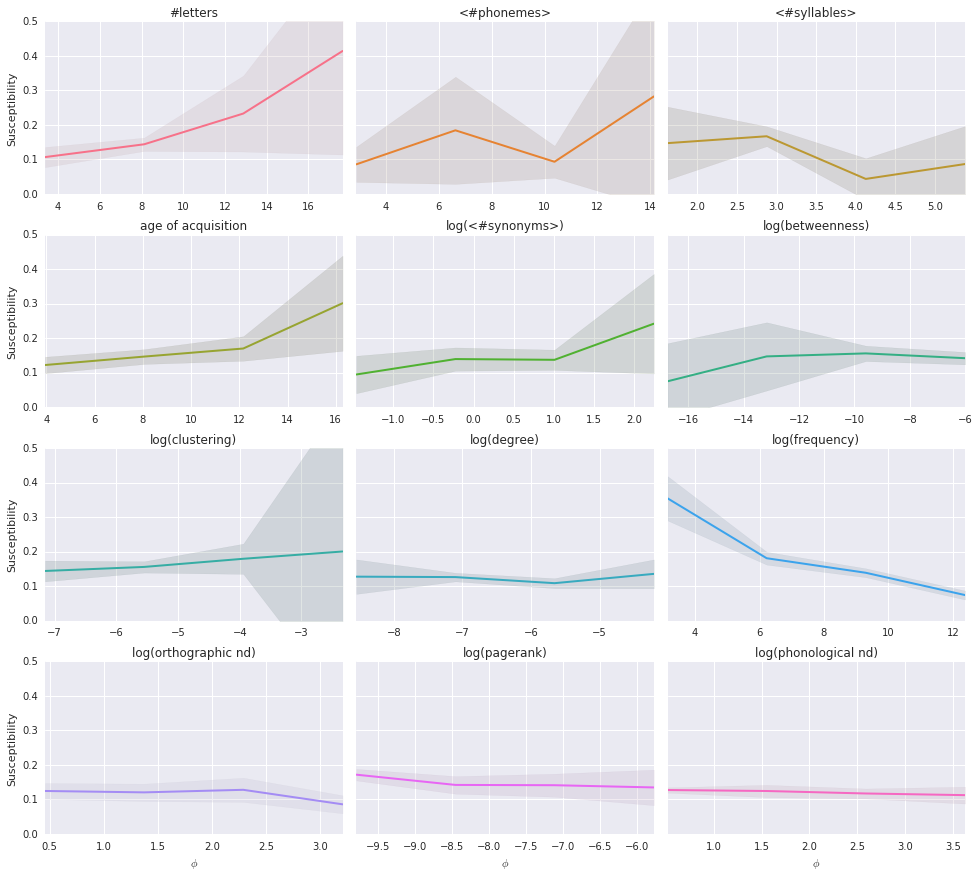

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

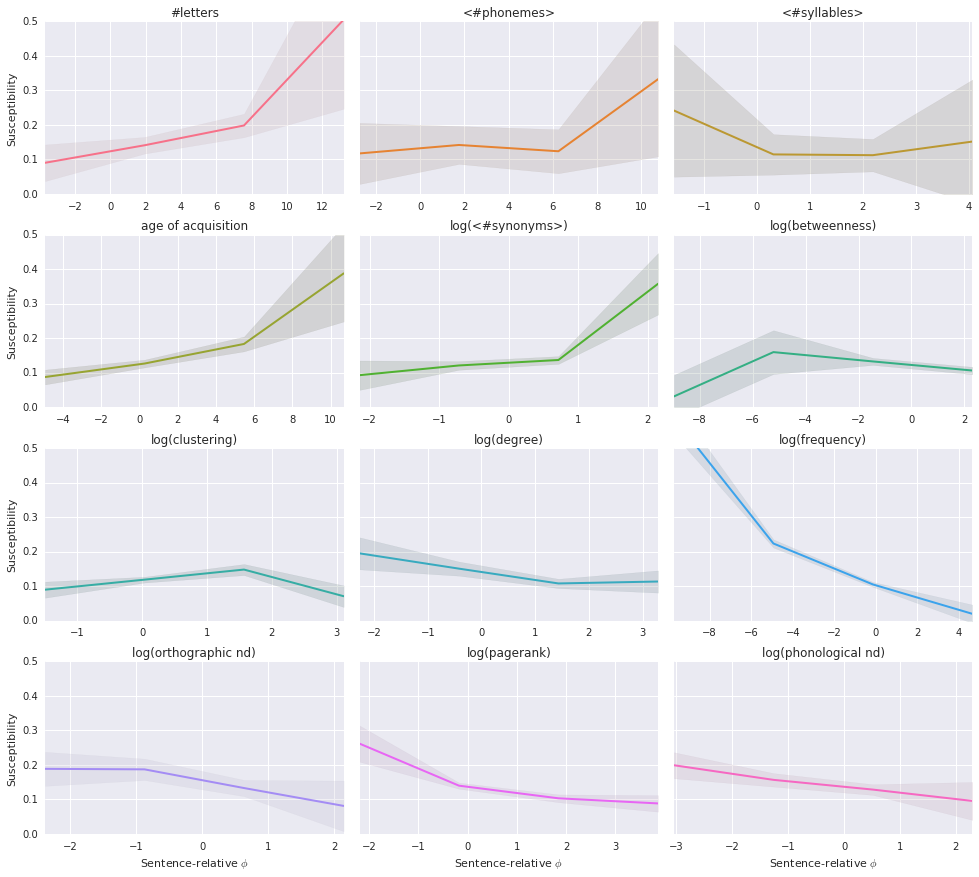

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

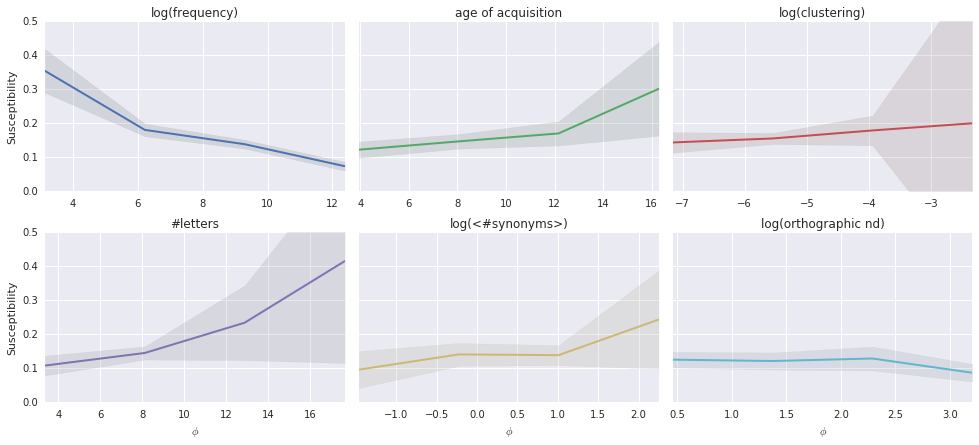

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

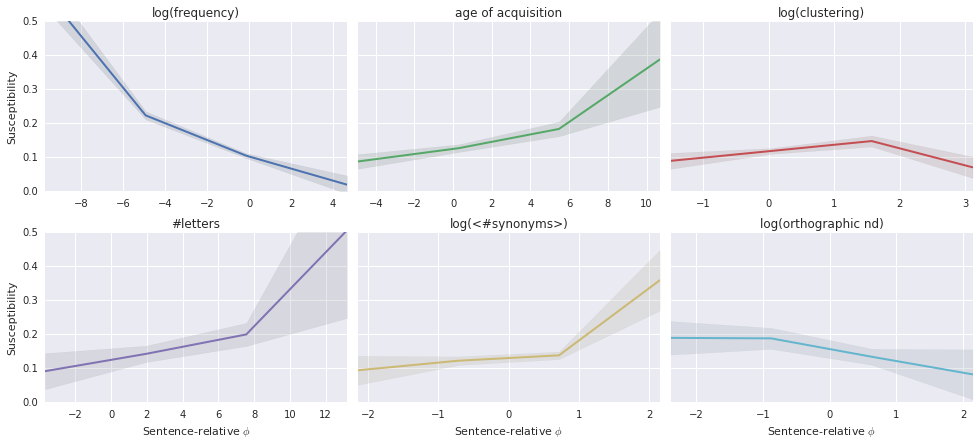

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

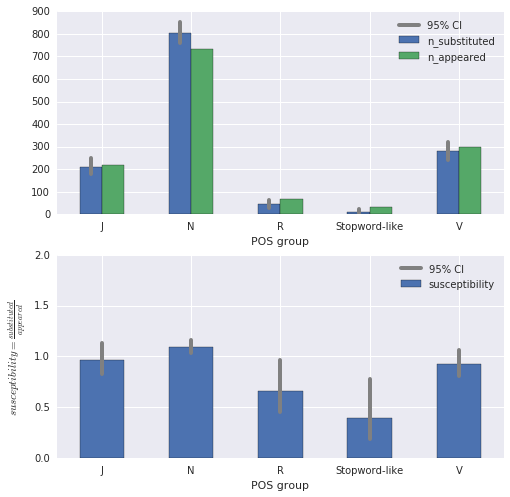

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['N', 'R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

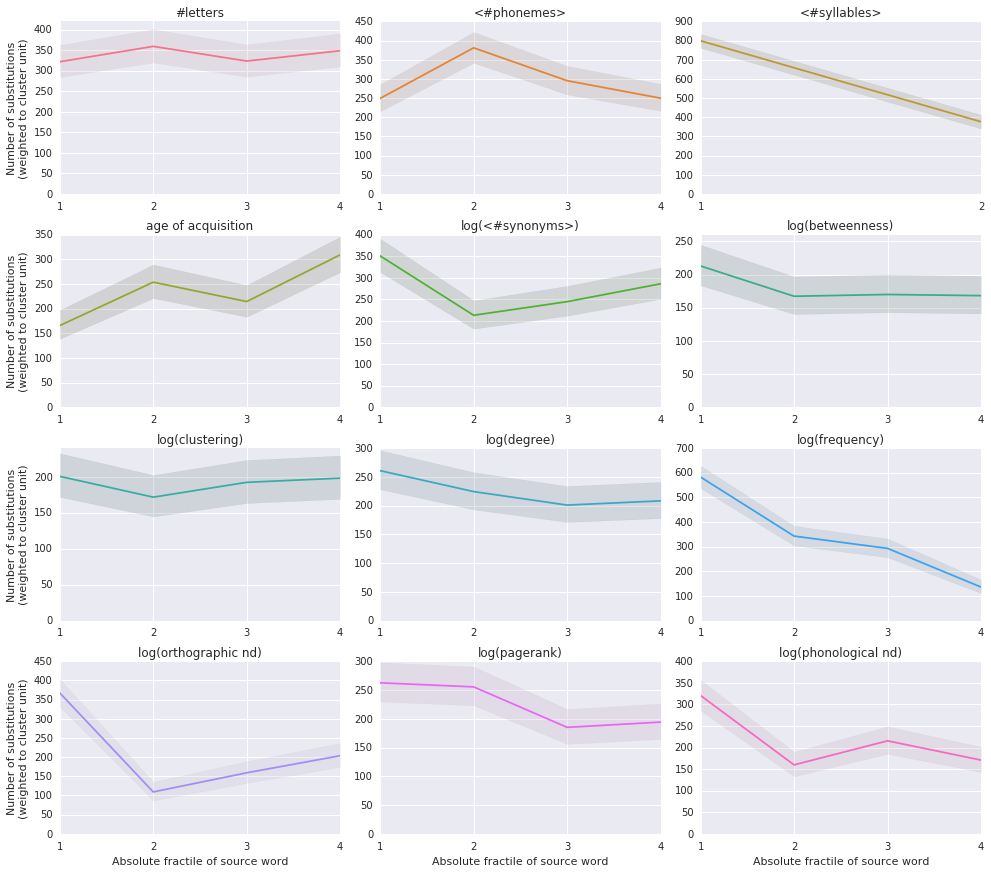

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

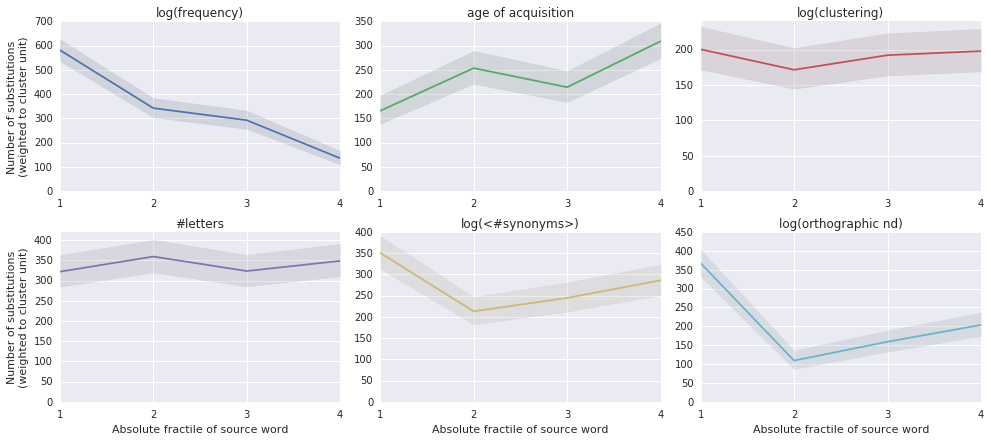

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   87 of 34285) |                    | Elapsed Time: 0:00:01 ETA:  0:06:36

  0% (  168 of 34285) |                    | Elapsed Time: 0:00:02 ETA:  0:07:03

  0% (  248 of 34285) |                    | Elapsed Time: 0:00:03 ETA:  0:07:05

  0% (  327 of 34285) |                    | Elapsed Time: 0:00:04 ETA:  0:07:06

  1% (  405 of 34285) |                    | Elapsed Time: 0:00:05 ETA:  0:07:08

  1% (  429 of 34285) |                    | Elapsed Time: 0:00:05 ETA:  0:07:08

  1% (  513 of 34285) |                    | Elapsed Time: 0:00:06 ETA:  0:07:02

  1% (  600 of 34285) |                    | Elapsed Time: 0:00:07 ETA:  0:06:56

  2% (  689 of 34285) |                    | Elapsed Time: 0:00:08 ETA:  0:06:50

  2% (  778 of 34285) |                    | Elapsed Time: 0:00:09 ETA:  0:06:45

  2% (  858 of 34285) |                    | Elapsed Time: 0:00:10 ETA:  0:06:38

  2% (  943 of 34285) |                    | Elapsed Time: 0:00:11 ETA:  0:06:34

  3% ( 1042 of 34285) |                    | Elapsed Time: 0:00:12 ETA:  0:06:22

  3% ( 1146 of 34285) |                    | Elapsed Time: 0:00:13 ETA:  0:06:07

  3% ( 1251 of 34285) |                    | Elapsed Time: 0:00:14 ETA:  0:05:57

  3% ( 1286 of 34285) |                    | Elapsed Time: 0:00:14 ETA:  0:05:51

  4% ( 1382 of 34285) |                    | Elapsed Time: 0:00:15 ETA:  0:05:45

  4% ( 1455 of 34285) |                    | Elapsed Time: 0:00:16 ETA:  0:05:52

  4% ( 1527 of 34285) |                    | Elapsed Time: 0:00:17 ETA:  0:05:59

  4% ( 1603 of 34285) |                    | Elapsed Time: 0:00:18 ETA:  0:06:06

  4% ( 1681 of 34285) |                    | Elapsed Time: 0:00:19 ETA:  0:06:09

  5% ( 1715 of 34285) |#                   | Elapsed Time: 0:00:20 ETA:  0:06:17

  5% ( 1805 of 34285) |#                   | Elapsed Time: 0:00:21 ETA:  0:06:24

  5% ( 1883 of 34285) |#                   | Elapsed Time: 0:00:22 ETA:  0:06:41

  5% ( 1956 of 34285) |#                   | Elapsed Time: 0:00:23 ETA:  0:06:50

  5% ( 2038 of 34285) |#                   | Elapsed Time: 0:00:24 ETA:  0:06:58

  6% ( 2143 of 34285) |#                   | Elapsed Time: 0:00:24 ETA:  0:06:20

  6% ( 2301 of 34285) |#                   | Elapsed Time: 0:00:25 ETA:  0:05:34

  7% ( 2461 of 34285) |#                   | Elapsed Time: 0:00:26 ETA:  0:04:57

  7% ( 2572 of 34285) |#                   | Elapsed Time: 0:00:27 ETA:  0:04:34

  7% ( 2711 of 34285) |#                   | Elapsed Time: 0:00:28 ETA:  0:04:21

  8% ( 2798 of 34285) |#                   | Elapsed Time: 0:00:29 ETA:  0:04:21

  8% ( 2878 of 34285) |#                   | Elapsed Time: 0:00:30 ETA:  0:04:19

  8% ( 2959 of 34285) |#                   | Elapsed Time: 0:00:31 ETA:  0:04:16

  8% ( 3000 of 34285) |#                   | Elapsed Time: 0:00:31 ETA:  0:04:10

  8% ( 3084 of 34285) |#                   | Elapsed Time: 0:00:32 ETA:  0:04:28

  9% ( 3170 of 34285) |#                   | Elapsed Time: 0:00:34 ETA:  0:04:52

  9% ( 3261 of 34285) |#                   | Elapsed Time: 0:00:35 ETA:  0:05:19

  9% ( 3353 of 34285) |#                   | Elapsed Time: 0:00:36 ETA:  0:05:38

 10% ( 3429 of 34285) |##                  | Elapsed Time: 0:00:36 ETA:  0:06:02

 10% ( 3535 of 34285) |##                  | Elapsed Time: 0:00:37 ETA:  0:05:51

 10% ( 3620 of 34285) |##                  | Elapsed Time: 0:00:38 ETA:  0:05:48

 10% ( 3703 of 34285) |##                  | Elapsed Time: 0:00:39 ETA:  0:05:45

 11% ( 3824 of 34285) |##                  | Elapsed Time: 0:00:40 ETA:  0:05:28

 11% ( 3858 of 34285) |##                  | Elapsed Time: 0:00:41 ETA:  0:05:18

 11% ( 3975 of 34285) |##                  | Elapsed Time: 0:00:42 ETA:  0:05:03

 11% ( 4068 of 34285) |##                  | Elapsed Time: 0:00:43 ETA:  0:05:01

 12% ( 4156 of 34285) |##                  | Elapsed Time: 0:00:44 ETA:  0:05:01

 12% ( 4245 of 34285) |##                  | Elapsed Time: 0:00:45 ETA:  0:05:02

 12% ( 4286 of 34285) |##                  | Elapsed Time: 0:00:45 ETA:  0:05:07

 12% ( 4374 of 34285) |##                  | Elapsed Time: 0:00:46 ETA:  0:05:04

 13% ( 4465 of 34285) |##                  | Elapsed Time: 0:00:47 ETA:  0:05:00

 13% ( 4562 of 34285) |##                  | Elapsed Time: 0:00:48 ETA:  0:05:10

 13% ( 4651 of 34285) |##                  | Elapsed Time: 0:00:49 ETA:  0:05:18

 13% ( 4715 of 34285) |##                  | Elapsed Time: 0:00:50 ETA:  0:05:29

 14% ( 4806 of 34285) |##                  | Elapsed Time: 0:00:51 ETA:  0:05:29

 14% ( 4898 of 34285) |##                  | Elapsed Time: 0:00:52 ETA:  0:05:26

 14% ( 4989 of 34285) |##                  | Elapsed Time: 0:00:53 ETA:  0:05:24

 14% ( 5078 of 34285) |##                  | Elapsed Time: 0:00:54 ETA:  0:05:24

 15% ( 5143 of 34285) |###                 | Elapsed Time: 0:00:55 ETA:  0:05:22

 15% ( 5235 of 34285) |###                 | Elapsed Time: 0:00:56 ETA:  0:05:20

 15% ( 5323 of 34285) |###                 | Elapsed Time: 0:00:57 ETA:  0:05:24

 15% ( 5413 of 34285) |###                 | Elapsed Time: 0:00:58 ETA:  0:05:22

 16% ( 5502 of 34285) |###                 | Elapsed Time: 0:00:59 ETA:  0:05:22

 16% ( 5572 of 34285) |###                 | Elapsed Time: 0:00:59 ETA:  0:05:22

 16% ( 5663 of 34285) |###                 | Elapsed Time: 0:01:00 ETA:  0:05:21

 16% ( 5755 of 34285) |###                 | Elapsed Time: 0:01:01 ETA:  0:05:20

 17% ( 5845 of 34285) |###                 | Elapsed Time: 0:01:02 ETA:  0:05:19

 17% ( 5948 of 34285) |###                 | Elapsed Time: 0:01:03 ETA:  0:05:12

 17% ( 6000 of 34285) |###                 | Elapsed Time: 0:01:04 ETA:  0:05:09

 17% ( 6103 of 34285) |###                 | Elapsed Time: 0:01:05 ETA:  0:05:01

 18% ( 6205 of 34285) |###                 | Elapsed Time: 0:01:06 ETA:  0:04:54

 18% ( 6297 of 34285) |###                 | Elapsed Time: 0:01:07 ETA:  0:04:52

 18% ( 6393 of 34285) |###                 | Elapsed Time: 0:01:08 ETA:  0:04:49

 18% ( 6429 of 34285) |###                 | Elapsed Time: 0:01:08 ETA:  0:04:47

 19% ( 6524 of 34285) |###                 | Elapsed Time: 0:01:09 ETA:  0:04:44

 19% ( 6617 of 34285) |###                 | Elapsed Time: 0:01:10 ETA:  0:04:42

 19% ( 6714 of 34285) |###                 | Elapsed Time: 0:01:11 ETA:  0:04:43

 19% ( 6809 of 34285) |###                 | Elapsed Time: 0:01:12 ETA:  0:04:44

 20% ( 6857 of 34285) |####                | Elapsed Time: 0:01:13 ETA:  0:04:47

 20% ( 6953 of 34285) |####                | Elapsed Time: 0:01:14 ETA:  0:04:50

 20% ( 7043 of 34285) |####                | Elapsed Time: 0:01:15 ETA:  0:04:49

 20% ( 7141 of 34285) |####                | Elapsed Time: 0:01:16 ETA:  0:04:47

 21% ( 7237 of 34285) |####                | Elapsed Time: 0:01:17 ETA:  0:04:45

 21% ( 7286 of 34285) |####                | Elapsed Time: 0:01:17 ETA:  0:04:45

 21% ( 7382 of 34285) |####                | Elapsed Time: 0:01:18 ETA:  0:04:42

 21% ( 7477 of 34285) |####                | Elapsed Time: 0:01:19 ETA:  0:04:42

 22% ( 7577 of 34285) |####                | Elapsed Time: 0:01:20 ETA:  0:04:39

 22% ( 7676 of 34285) |####                | Elapsed Time: 0:01:21 ETA:  0:04:36

 22% ( 7715 of 34285) |####                | Elapsed Time: 0:01:22 ETA:  0:04:35

 22% ( 7813 of 34285) |####                | Elapsed Time: 0:01:23 ETA:  0:04:31

 23% ( 7912 of 34285) |####                | Elapsed Time: 0:01:24 ETA:  0:04:29

 23% ( 8010 of 34285) |####                | Elapsed Time: 0:01:25 ETA:  0:04:27

 23% ( 8107 of 34285) |####                | Elapsed Time: 0:01:26 ETA:  0:04:25

 23% ( 8143 of 34285) |####                | Elapsed Time: 0:01:26 ETA:  0:04:25

 24% ( 8239 of 34285) |####                | Elapsed Time: 0:01:27 ETA:  0:04:23

 24% ( 8337 of 34285) |####                | Elapsed Time: 0:01:28 ETA:  0:04:24

 24% ( 8435 of 34285) |####                | Elapsed Time: 0:01:29 ETA:  0:04:23

 24% ( 8531 of 34285) |####                | Elapsed Time: 0:01:30 ETA:  0:04:23

 25% ( 8572 of 34285) |#####               | Elapsed Time: 0:01:31 ETA:  0:04:24

 25% ( 8671 of 34285) |#####               | Elapsed Time: 0:01:32 ETA:  0:04:23

 25% ( 8746 of 34285) |#####               | Elapsed Time: 0:01:33 ETA:  0:04:33

 25% ( 8822 of 34285) |#####               | Elapsed Time: 0:01:34 ETA:  0:04:43

 25% ( 8901 of 34285) |#####               | Elapsed Time: 0:01:35 ETA:  0:04:49

 26% ( 8976 of 34285) |#####               | Elapsed Time: 0:01:37 ETA:  0:06:09

 26% ( 9000 of 34285) |#####               | Elapsed Time: 0:01:38 ETA:  0:06:23

 26% ( 9094 of 34285) |#####               | Elapsed Time: 0:01:39 ETA:  0:06:25

 26% ( 9180 of 34285) |#####               | Elapsed Time: 0:01:40 ETA:  0:06:32

 27% ( 9260 of 34285) |#####               | Elapsed Time: 0:01:41 ETA:  0:06:30

 27% ( 9335 of 34285) |#####               | Elapsed Time: 0:01:42 ETA:  0:06:47

 27% ( 9410 of 34285) |#####               | Elapsed Time: 0:01:43 ETA:  0:06:46

 27% ( 9429 of 34285) |#####               | Elapsed Time: 0:01:43 ETA:  0:06:51

 27% ( 9505 of 34285) |#####               | Elapsed Time: 0:01:44 ETA:  0:06:52

 27% ( 9595 of 34285) |#####               | Elapsed Time: 0:01:45 ETA:  0:05:14

 28% ( 9695 of 34285) |#####               | Elapsed Time: 0:01:46 ETA:  0:05:02

 28% ( 9797 of 34285) |#####               | Elapsed Time: 0:01:47 ETA:  0:04:56

 28% ( 9857 of 34285) |#####               | Elapsed Time: 0:01:47 ETA:  0:04:51

 29% ( 9960 of 34285) |#####               | Elapsed Time: 0:01:48 ETA:  0:04:37

 29% (10063 of 34285) |#####               | Elapsed Time: 0:01:49 ETA:  0:04:21

 29% (10160 of 34285) |#####               | Elapsed Time: 0:01:50 ETA:  0:04:09

 29% (10236 of 34285) |#####               | Elapsed Time: 0:01:51 ETA:  0:04:15

 30% (10286 of 34285) |######              | Elapsed Time: 0:01:52 ETA:  0:04:11

 30% (10415 of 34285) |######              | Elapsed Time: 0:01:53 ETA:  0:03:53

 30% (10529 of 34285) |######              | Elapsed Time: 0:01:54 ETA:  0:03:46

 30% (10610 of 34285) |######              | Elapsed Time: 0:01:55 ETA:  0:03:54

 31% (10715 of 34285) |######              | Elapsed Time: 0:01:56 ETA:  0:03:54

 31% (10815 of 34285) |######              | Elapsed Time: 0:01:57 ETA:  0:03:55

 31% (10903 of 34285) |######              | Elapsed Time: 0:01:58 ETA:  0:03:58

 32% (11006 of 34285) |######              | Elapsed Time: 0:01:59 ETA:  0:03:44

 32% (11143 of 34285) |######              | Elapsed Time: 0:02:00 ETA:  0:03:38

 32% (11269 of 34285) |######              | Elapsed Time: 0:02:01 ETA:  0:03:32

 33% (11394 of 34285) |######              | Elapsed Time: 0:02:02 ETA:  0:03:12

 33% (11521 of 34285) |######              | Elapsed Time: 0:02:03 ETA:  0:03:01

 33% (11572 of 34285) |######              | Elapsed Time: 0:02:04 ETA:  0:02:59

 34% (11706 of 34285) |######              | Elapsed Time: 0:02:05 ETA:  0:02:46

 34% (11787 of 34285) |######              | Elapsed Time: 0:02:06 ETA:  0:02:47

 34% (11871 of 34285) |######              | Elapsed Time: 0:02:07 ETA:  0:02:53

 34% (11953 of 34285) |######              | Elapsed Time: 0:02:08 ETA:  0:03:07

 35% (12000 of 34285) |#######             | Elapsed Time: 0:02:08 ETA:  0:03:07

 35% (12102 of 34285) |#######             | Elapsed Time: 0:02:09 ETA:  0:03:15

 35% (12203 of 34285) |#######             | Elapsed Time: 0:02:10 ETA:  0:03:24

 35% (12313 of 34285) |#######             | Elapsed Time: 0:02:11 ETA:  0:03:30

 36% (12429 of 34285) |#######             | Elapsed Time: 0:02:12 ETA:  0:03:44

 36% (12539 of 34285) |#######             | Elapsed Time: 0:02:13 ETA:  0:03:29

 36% (12631 of 34285) |#######             | Elapsed Time: 0:02:14 ETA:  0:03:25

 37% (12716 of 34285) |#######             | Elapsed Time: 0:02:15 ETA:  0:03:23

 37% (12813 of 34285) |#######             | Elapsed Time: 0:02:16 ETA:  0:03:24

 37% (12857 of 34285) |#######             | Elapsed Time: 0:02:17 ETA:  0:03:29

 37% (12940 of 34285) |#######             | Elapsed Time: 0:02:18 ETA:  0:03:36

 38% (13076 of 34285) |#######             | Elapsed Time: 0:02:19 ETA:  0:03:23

 38% (13209 of 34285) |#######             | Elapsed Time: 0:02:20 ETA:  0:03:12

 38% (13286 of 34285) |#######             | Elapsed Time: 0:02:21 ETA:  0:03:10

 38% (13371 of 34285) |#######             | Elapsed Time: 0:02:22 ETA:  0:03:18

 39% (13474 of 34285) |#######             | Elapsed Time: 0:02:23 ETA:  0:03:12

 39% (13584 of 34285) |#######             | Elapsed Time: 0:02:24 ETA:  0:03:02

 39% (13678 of 34285) |#######             | Elapsed Time: 0:02:25 ETA:  0:03:02

 40% (13714 of 34285) |########            | Elapsed Time: 0:02:25 ETA:  0:03:01

 40% (13788 of 34285) |########            | Elapsed Time: 0:02:26 ETA:  0:03:04

 40% (13869 of 34285) |########            | Elapsed Time: 0:02:27 ETA:  0:03:26

 40% (13943 of 34285) |########            | Elapsed Time: 0:02:28 ETA:  0:03:54

 40% (14036 of 34285) |########            | Elapsed Time: 0:02:29 ETA:  0:03:59

 41% (14143 of 34285) |########            | Elapsed Time: 0:02:30 ETA:  0:04:00

 41% (14232 of 34285) |########            | Elapsed Time: 0:02:31 ETA:  0:04:11

 41% (14319 of 34285) |########            | Elapsed Time: 0:02:32 ETA:  0:04:14

 42% (14415 of 34285) |########            | Elapsed Time: 0:02:33 ETA:  0:04:05

 42% (14509 of 34285) |########            | Elapsed Time: 0:02:34 ETA:  0:03:53

 42% (14572 of 34285) |########            | Elapsed Time: 0:02:35 ETA:  0:03:47

 42% (14667 of 34285) |########            | Elapsed Time: 0:02:36 ETA:  0:03:35

 43% (14762 of 34285) |########            | Elapsed Time: 0:02:37 ETA:  0:03:33

 43% (14853 of 34285) |########            | Elapsed Time: 0:02:38 ETA:  0:03:34

 43% (14933 of 34285) |########            | Elapsed Time: 0:02:39 ETA:  0:03:40

 43% (15000 of 34285) |########            | Elapsed Time: 0:02:40 ETA:  0:03:35

 44% (15102 of 34285) |########            | Elapsed Time: 0:02:41 ETA:  0:03:27

 44% (15202 of 34285) |########            | Elapsed Time: 0:02:42 ETA:  0:03:24

 44% (15293 of 34285) |########            | Elapsed Time: 0:02:43 ETA:  0:03:25

 44% (15369 of 34285) |########            | Elapsed Time: 0:02:44 ETA:  0:03:31

 45% (15429 of 34285) |#########           | Elapsed Time: 0:02:44 ETA:  0:03:34

 45% (15507 of 34285) |#########           | Elapsed Time: 0:02:45 ETA:  0:03:42

 45% (15586 of 34285) |#########           | Elapsed Time: 0:02:46 ETA:  0:03:47

 45% (15665 of 34285) |#########           | Elapsed Time: 0:02:47 ETA:  0:03:47

 45% (15750 of 34285) |#########           | Elapsed Time: 0:02:48 ETA:  0:03:51

 46% (15832 of 34285) |#########           | Elapsed Time: 0:02:49 ETA:  0:04:01

 46% (15857 of 34285) |#########           | Elapsed Time: 0:02:50 ETA:  0:04:07

 46% (15974 of 34285) |#########           | Elapsed Time: 0:02:51 ETA:  0:03:49

 46% (16085 of 34285) |#########           | Elapsed Time: 0:02:52 ETA:  0:03:28

 47% (16183 of 34285) |#########           | Elapsed Time: 0:02:53 ETA:  0:03:22

 47% (16286 of 34285) |#########           | Elapsed Time: 0:02:54 ETA:  0:03:04

 47% (16380 of 34285) |#########           | Elapsed Time: 0:02:55 ETA:  0:02:55

 48% (16471 of 34285) |#########           | Elapsed Time: 0:02:56 ETA:  0:02:52

 48% (16558 of 34285) |#########           | Elapsed Time: 0:02:57 ETA:  0:02:48

 48% (16643 of 34285) |#########           | Elapsed Time: 0:02:58 ETA:  0:02:56

 48% (16714 of 34285) |#########           | Elapsed Time: 0:02:59 ETA:  0:03:10

 49% (16832 of 34285) |#########           | Elapsed Time: 0:03:00 ETA:  0:03:06

 49% (16914 of 34285) |#########           | Elapsed Time: 0:03:01 ETA:  0:03:13

 49% (16991 of 34285) |#########           | Elapsed Time: 0:03:02 ETA:  0:03:22

 49% (17085 of 34285) |#########           | Elapsed Time: 0:03:03 ETA:  0:03:19

 50% (17143 of 34285) |##########          | Elapsed Time: 0:03:03 ETA:  0:03:20

 50% (17237 of 34285) |##########          | Elapsed Time: 0:03:04 ETA:  0:03:17

 50% (17345 of 34285) |##########          | Elapsed Time: 0:03:05 ETA:  0:03:06

 50% (17473 of 34285) |##########          | Elapsed Time: 0:03:06 ETA:  0:02:45

 51% (17572 of 34285) |##########          | Elapsed Time: 0:03:07 ETA:  0:02:34

 51% (17678 of 34285) |##########          | Elapsed Time: 0:03:08 ETA:  0:02:38

 51% (17764 of 34285) |##########          | Elapsed Time: 0:03:09 ETA:  0:02:35

 52% (17865 of 34285) |##########          | Elapsed Time: 0:03:10 ETA:  0:02:25

 52% (17972 of 34285) |##########          | Elapsed Time: 0:03:11 ETA:  0:02:19

 52% (18000 of 34285) |##########          | Elapsed Time: 0:03:12 ETA:  0:02:20

 52% (18083 of 34285) |##########          | Elapsed Time: 0:03:13 ETA:  0:02:24

 52% (18160 of 34285) |##########          | Elapsed Time: 0:03:14 ETA:  0:02:35

 53% (18229 of 34285) |##########          | Elapsed Time: 0:03:15 ETA:  0:03:02

 53% (18308 of 34285) |##########          | Elapsed Time: 0:03:16 ETA:  0:03:17

 53% (18395 of 34285) |##########          | Elapsed Time: 0:03:17 ETA:  0:03:27

 53% (18429 of 34285) |##########          | Elapsed Time: 0:03:17 ETA:  0:03:29

 53% (18513 of 34285) |##########          | Elapsed Time: 0:03:18 ETA:  0:03:39

 54% (18598 of 34285) |##########          | Elapsed Time: 0:03:19 ETA:  0:03:52

 54% (18689 of 34285) |##########          | Elapsed Time: 0:03:20 ETA:  0:03:43

 54% (18780 of 34285) |##########          | Elapsed Time: 0:03:21 ETA:  0:03:37

 55% (18857 of 34285) |###########         | Elapsed Time: 0:03:22 ETA:  0:03:28

 55% (18948 of 34285) |###########         | Elapsed Time: 0:03:23 ETA:  0:03:14

 55% (19036 of 34285) |###########         | Elapsed Time: 0:03:24 ETA:  0:03:08

 55% (19151 of 34285) |###########         | Elapsed Time: 0:03:25 ETA:  0:02:52

 56% (19231 of 34285) |###########         | Elapsed Time: 0:03:26 ETA:  0:02:54

 56% (19286 of 34285) |###########         | Elapsed Time: 0:03:27 ETA:  0:02:50

 56% (19399 of 34285) |###########         | Elapsed Time: 0:03:28 ETA:  0:02:35

 56% (19490 of 34285) |###########         | Elapsed Time: 0:03:29 ETA:  0:02:34

 57% (19558 of 34285) |###########         | Elapsed Time: 0:03:30 ETA:  0:02:45

 57% (19644 of 34285) |###########         | Elapsed Time: 0:03:31 ETA:  0:02:46

 57% (19714 of 34285) |###########         | Elapsed Time: 0:03:31 ETA:  0:02:47

 57% (19796 of 34285) |###########         | Elapsed Time: 0:03:32 ETA:  0:02:48

 57% (19877 of 34285) |###########         | Elapsed Time: 0:03:33 ETA:  0:03:05

 58% (19958 of 34285) |###########         | Elapsed Time: 0:03:34 ETA:  0:03:04

 58% (20039 of 34285) |###########         | Elapsed Time: 0:03:35 ETA:  0:03:07

 58% (20119 of 34285) |###########         | Elapsed Time: 0:03:36 ETA:  0:03:25

 58% (20143 of 34285) |###########         | Elapsed Time: 0:03:37 ETA:  0:03:30

 58% (20224 of 34285) |###########         | Elapsed Time: 0:03:38 ETA:  0:03:20

 59% (20312 of 34285) |###########         | Elapsed Time: 0:03:39 ETA:  0:03:18

 59% (20395 of 34285) |###########         | Elapsed Time: 0:03:40 ETA:  0:03:20

 59% (20475 of 34285) |###########         | Elapsed Time: 0:03:41 ETA:  0:03:20

 60% (20571 of 34285) |############        | Elapsed Time: 0:03:42 ETA:  0:03:19

 60% (20699 of 34285) |############        | Elapsed Time: 0:03:43 ETA:  0:02:48

 60% (20812 of 34285) |############        | Elapsed Time: 0:03:44 ETA:  0:02:28

 60% (20908 of 34285) |############        | Elapsed Time: 0:03:45 ETA:  0:02:24

 61% (21000 of 34285) |############        | Elapsed Time: 0:03:46 ETA:  0:02:12

 61% (21096 of 34285) |############        | Elapsed Time: 0:03:47 ETA:  0:02:07

 61% (21202 of 34285) |############        | Elapsed Time: 0:03:48 ETA:  0:01:56

 62% (21285 of 34285) |############        | Elapsed Time: 0:03:49 ETA:  0:01:53

 62% (21393 of 34285) |############        | Elapsed Time: 0:03:50 ETA:  0:01:40

 62% (21429 of 34285) |############        | Elapsed Time: 0:03:50 ETA:  0:01:43

 62% (21446 of 34285) |############        | Elapsed Time: 0:03:52 ETA:  0:03:20

 62% (21552 of 34285) |############        | Elapsed Time: 0:03:53 ETA:  0:03:23

 63% (21641 of 34285) |############        | Elapsed Time: 0:03:54 ETA:  0:03:27

 63% (21735 of 34285) |############        | Elapsed Time: 0:03:55 ETA:  0:03:31

 63% (21857 of 34285) |############        | Elapsed Time: 0:03:57 ETA:  0:03:36

 64% (21949 of 34285) |############        | Elapsed Time: 0:03:58 ETA:  0:03:28

 64% (22044 of 34285) |############        | Elapsed Time: 0:03:59 ETA:  0:03:36

 64% (22129 of 34285) |############        | Elapsed Time: 0:04:00 ETA:  0:03:30

 64% (22216 of 34285) |############        | Elapsed Time: 0:04:01 ETA:  0:02:00

 65% (22286 of 34285) |#############       | Elapsed Time: 0:04:01 ETA:  0:02:11

 65% (22378 of 34285) |#############       | Elapsed Time: 0:04:02 ETA:  0:02:09

 65% (22478 of 34285) |#############       | Elapsed Time: 0:04:03 ETA:  0:02:05

 65% (22575 of 34285) |#############       | Elapsed Time: 0:04:04 ETA:  0:02:13

 66% (22674 of 34285) |#############       | Elapsed Time: 0:04:05 ETA:  0:02:08

 66% (22714 of 34285) |#############       | Elapsed Time: 0:04:06 ETA:  0:02:02

 66% (22837 of 34285) |#############       | Elapsed Time: 0:04:07 ETA:  0:01:48

 66% (22943 of 34285) |#############       | Elapsed Time: 0:04:08 ETA:  0:01:38

 67% (23031 of 34285) |#############       | Elapsed Time: 0:04:09 ETA:  0:01:36

 67% (23143 of 34285) |#############       | Elapsed Time: 0:04:10 ETA:  0:01:21

 67% (23249 of 34285) |#############       | Elapsed Time: 0:04:11 ETA:  0:01:17

 68% (23346 of 34285) |#############       | Elapsed Time: 0:04:12 ETA:  0:01:16

 68% (23438 of 34285) |#############       | Elapsed Time: 0:04:13 ETA:  0:01:18

 68% (23537 of 34285) |#############       | Elapsed Time: 0:04:14 ETA:  0:01:22

 68% (23571 of 34285) |#############       | Elapsed Time: 0:04:14 ETA:  0:01:33

 69% (23657 of 34285) |#############       | Elapsed Time: 0:04:15 ETA:  0:01:42

 69% (23788 of 34285) |#############       | Elapsed Time: 0:04:16 ETA:  0:01:21

 69% (23894 of 34285) |#############       | Elapsed Time: 0:04:17 ETA:  0:01:19

 70% (24000 of 34285) |##############      | Elapsed Time: 0:04:18 ETA:  0:01:27

 70% (24094 of 34285) |##############      | Elapsed Time: 0:04:19 ETA:  0:01:27

 70% (24191 of 34285) |##############      | Elapsed Time: 0:04:20 ETA:  0:01:24

 70% (24283 of 34285) |##############      | Elapsed Time: 0:04:21 ETA:  0:01:26

 71% (24365 of 34285) |##############      | Elapsed Time: 0:04:22 ETA:  0:01:30

 71% (24429 of 34285) |##############      | Elapsed Time: 0:04:23 ETA:  0:01:27

 71% (24537 of 34285) |##############      | Elapsed Time: 0:04:24 ETA:  0:01:37

 71% (24648 of 34285) |##############      | Elapsed Time: 0:04:25 ETA:  0:01:34

 72% (24742 of 34285) |##############      | Elapsed Time: 0:04:26 ETA:  0:01:31

 72% (24822 of 34285) |##############      | Elapsed Time: 0:04:27 ETA:  0:01:37

 72% (24857 of 34285) |##############      | Elapsed Time: 0:04:28 ETA:  0:01:43

 72% (24956 of 34285) |##############      | Elapsed Time: 0:04:29 ETA:  0:01:41

 73% (25041 of 34285) |##############      | Elapsed Time: 0:04:30 ETA:  0:01:44

 73% (25130 of 34285) |##############      | Elapsed Time: 0:04:31 ETA:  0:01:40

 73% (25229 of 34285) |##############      | Elapsed Time: 0:04:32 ETA:  0:01:35

 73% (25286 of 34285) |##############      | Elapsed Time: 0:04:32 ETA:  0:01:43

 74% (25388 of 34285) |##############      | Elapsed Time: 0:04:33 ETA:  0:01:47

 74% (25491 of 34285) |##############      | Elapsed Time: 0:04:34 ETA:  0:01:41

 74% (25579 of 34285) |##############      | Elapsed Time: 0:04:35 ETA:  0:01:36

 74% (25678 of 34285) |##############      | Elapsed Time: 0:04:36 ETA:  0:01:27

 75% (25714 of 34285) |###############     | Elapsed Time: 0:04:37 ETA:  0:01:29

 75% (25816 of 34285) |###############     | Elapsed Time: 0:04:38 ETA:  0:01:19

 75% (25927 of 34285) |###############     | Elapsed Time: 0:04:39 ETA:  0:01:08

 75% (26029 of 34285) |###############     | Elapsed Time: 0:04:40 ETA:  0:01:06

 76% (26143 of 34285) |###############     | Elapsed Time: 0:04:41 ETA:  0:00:54

 76% (26260 of 34285) |###############     | Elapsed Time: 0:04:42 ETA:  0:00:47

 76% (26362 of 34285) |###############     | Elapsed Time: 0:04:43 ETA:  0:00:47

 77% (26463 of 34285) |###############     | Elapsed Time: 0:04:44 ETA:  0:00:41

 77% (26571 of 34285) |###############     | Elapsed Time: 0:04:45 ETA:  0:00:35

 77% (26664 of 34285) |###############     | Elapsed Time: 0:04:46 ETA:  0:00:37

 78% (26774 of 34285) |###############     | Elapsed Time: 0:04:47 ETA:  0:00:36

 78% (26867 of 34285) |###############     | Elapsed Time: 0:04:48 ETA:  0:00:39

 78% (26953 of 34285) |###############     | Elapsed Time: 0:04:49 ETA:  0:00:51

 78% (27000 of 34285) |###############     | Elapsed Time: 0:04:49 ETA:  0:00:53

 79% (27096 of 34285) |###############     | Elapsed Time: 0:04:50 ETA:  0:00:55

 79% (27188 of 34285) |###############     | Elapsed Time: 0:04:51 ETA:  0:00:58

 79% (27304 of 34285) |###############     | Elapsed Time: 0:04:52 ETA:  0:00:52

 79% (27407 of 34285) |###############     | Elapsed Time: 0:04:53 ETA:  0:00:50

 80% (27428 of 34285) |################    | Elapsed Time: 0:04:53 ETA:  0:00:47

 80% (27529 of 34285) |################    | Elapsed Time: 0:04:54 ETA:  0:00:50

 80% (27614 of 34285) |################    | Elapsed Time: 0:04:55 ETA:  0:00:53

 80% (27708 of 34285) |################    | Elapsed Time: 0:04:56 ETA:  0:00:48

 81% (27802 of 34285) |################    | Elapsed Time: 0:04:57 ETA:  0:00:54

 81% (27857 of 34285) |################    | Elapsed Time: 0:04:58 ETA:  0:00:56

 81% (27958 of 34285) |################    | Elapsed Time: 0:04:59 ETA:  0:00:51

 81% (28056 of 34285) |################    | Elapsed Time: 0:05:00 ETA:  0:00:58

 82% (28156 of 34285) |################    | Elapsed Time: 0:05:01 ETA:  0:00:58

 82% (28243 of 34285) |################    | Elapsed Time: 0:05:02 ETA:  0:01:01

 82% (28286 of 34285) |################    | Elapsed Time: 0:05:02 ETA:  0:00:59

 82% (28386 of 34285) |################    | Elapsed Time: 0:05:03 ETA:  0:00:51

 83% (28472 of 34285) |################    | Elapsed Time: 0:05:04 ETA:  0:00:53

 83% (28565 of 34285) |################    | Elapsed Time: 0:05:05 ETA:  0:00:53

 83% (28667 of 34285) |################    | Elapsed Time: 0:05:06 ETA:  0:00:47

 83% (28714 of 34285) |################    | Elapsed Time: 0:05:07 ETA:  0:00:47

 84% (28830 of 34285) |################    | Elapsed Time: 0:05:08 ETA:  0:00:38

 84% (28937 of 34285) |################    | Elapsed Time: 0:05:09 ETA:  0:00:34

 84% (29038 of 34285) |################    | Elapsed Time: 0:05:10 ETA:  0:00:27

 85% (29143 of 34285) |#################   | Elapsed Time: 0:05:11 ETA:  0:00:23

 85% (29258 of 34285) |#################   | Elapsed Time: 0:05:12 ETA:  0:00:16

 85% (29355 of 34285) |#################   | Elapsed Time: 0:05:13 ETA:  0:00:11

 85% (29464 of 34285) |#################   | Elapsed Time: 0:05:14 ETA:  0:00:04

 86% (29571 of 34285) |#################   | Elapsed Time: 0:05:15 ETA:  0:00:05

 86% (29667 of 34285) |#################   | Elapsed Time: 0:05:16 ETA:  0:00:12

 86% (29776 of 34285) |#################   | Elapsed Time: 0:05:17 ETA:  0:00:10

 87% (29871 of 34285) |#################   | Elapsed Time: 0:05:18 ETA:  0:00:11

 87% (30000 of 34285) |#################   | Elapsed Time: 0:05:19 ETA:  0:00:19

 87% (30092 of 34285) |#################   | Elapsed Time: 0:05:20 ETA:  0:00:20

 88% (30210 of 34285) |#################   | Elapsed Time: 0:05:21 ETA:  0:00:15

 88% (30308 of 34285) |#################   | Elapsed Time: 0:05:22 ETA:  0:00:13

 88% (30428 of 34285) |#################   | Elapsed Time: 0:05:23 ETA:  0:00:02

 89% (30554 of 34285) |#################   | Elapsed Time: 0:05:24 ETA:  0:00:00

 89% (30652 of 34285) |#################   | Elapsed Time: 0:05:25 ETA:  0:00:00

 89% (30744 of 34285) |#################   | Elapsed Time: 0:05:26 ETA:  0:00:00

 89% (30834 of 34285) |#################   | Elapsed Time: 0:05:27 ETA:  0:00:04

 90% (30857 of 34285) |##################  | Elapsed Time: 0:05:27 ETA:  0:00:00

 90% (30968 of 34285) |##################  | Elapsed Time: 0:05:28 ETA:  0:00:01

 90% (31065 of 34285) |##################  | Elapsed Time: 0:05:29 ETA:  0:00:01

 90% (31171 of 34285) |##################  | Elapsed Time: 0:05:30 ETA:  0:00:04

 91% (31286 of 34285) |##################  | Elapsed Time: 0:05:32 ETA:  0:00:14

 91% (31379 of 34285) |##################  | Elapsed Time: 0:05:33 ETA:  0:00:15

 91% (31475 of 34285) |##################  | Elapsed Time: 0:05:34 ETA:  0:00:12

 92% (31554 of 34285) |##################  | Elapsed Time: 0:05:35 ETA:  0:00:16

 92% (31656 of 34285) |##################  | Elapsed Time: 0:05:36 ETA:  0:00:13

 92% (31714 of 34285) |##################  | Elapsed Time: 0:05:36 ETA:  0:00:17

 92% (31820 of 34285) |##################  | Elapsed Time: 0:05:37 ETA:  0:00:11

 93% (31926 of 34285) |##################  | Elapsed Time: 0:05:38 ETA:  0:00:11

 93% (32035 of 34285) |##################  | Elapsed Time: 0:05:39 ETA:  0:00:06

 93% (32143 of 34285) |##################  | Elapsed Time: 0:05:40 ETA:  0:00:02

 94% (32245 of 34285) |##################  | Elapsed Time: 0:05:41 ETA:  0:00:00

 94% (32342 of 34285) |##################  | Elapsed Time: 0:05:42 ETA:  0:00:00

 94% (32443 of 34285) |##################  | Elapsed Time: 0:05:43 ETA:  0:00:00

 95% (32571 of 34285) |################### | Elapsed Time: 0:05:44 ETA:  0:00:00

 95% (32691 of 34285) |################### | Elapsed Time: 0:05:45 ETA:  0:00:00

 95% (32798 of 34285) |################### | Elapsed Time: 0:05:46 ETA:  0:00:00

 95% (32900 of 34285) |################### | Elapsed Time: 0:05:47 ETA:  0:00:00

 96% (33000 of 34285) |################### | Elapsed Time: 0:05:48 ETA:  0:00:00

 96% (33104 of 34285) |################### | Elapsed Time: 0:05:49 ETA:  0:00:00

 96% (33212 of 34285) |################### | Elapsed Time: 0:05:50 ETA:  0:00:00

 97% (33323 of 34285) |################### | Elapsed Time: 0:05:51 ETA:  0:00:00

 97% (33428 of 34285) |################### | Elapsed Time: 0:05:53 ETA:  0:00:00

 97% (33539 of 34285) |################### | Elapsed Time: 0:05:54 ETA:  0:00:00

 98% (33638 of 34285) |################### | Elapsed Time: 0:05:55 ETA:  0:00:00

 98% (33749 of 34285) |################### | Elapsed Time: 0:05:56 ETA:  0:00:00

 98% (33857 of 34285) |################### | Elapsed Time: 0:05:57 ETA:  0:00:00

 99% (33958 of 34285) |################### | Elapsed Time: 0:05:58 ETA:  0:00:00

 99% (34060 of 34285) |################### | Elapsed Time: 0:05:59 ETA:  0:00:00

 99% (34168 of 34285) |################### | Elapsed Time: 0:06:00 ETA:  0:00:00

100% (34285 of 34285) |####################| Elapsed Time: 0:06:01 Time: 0:06:01


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

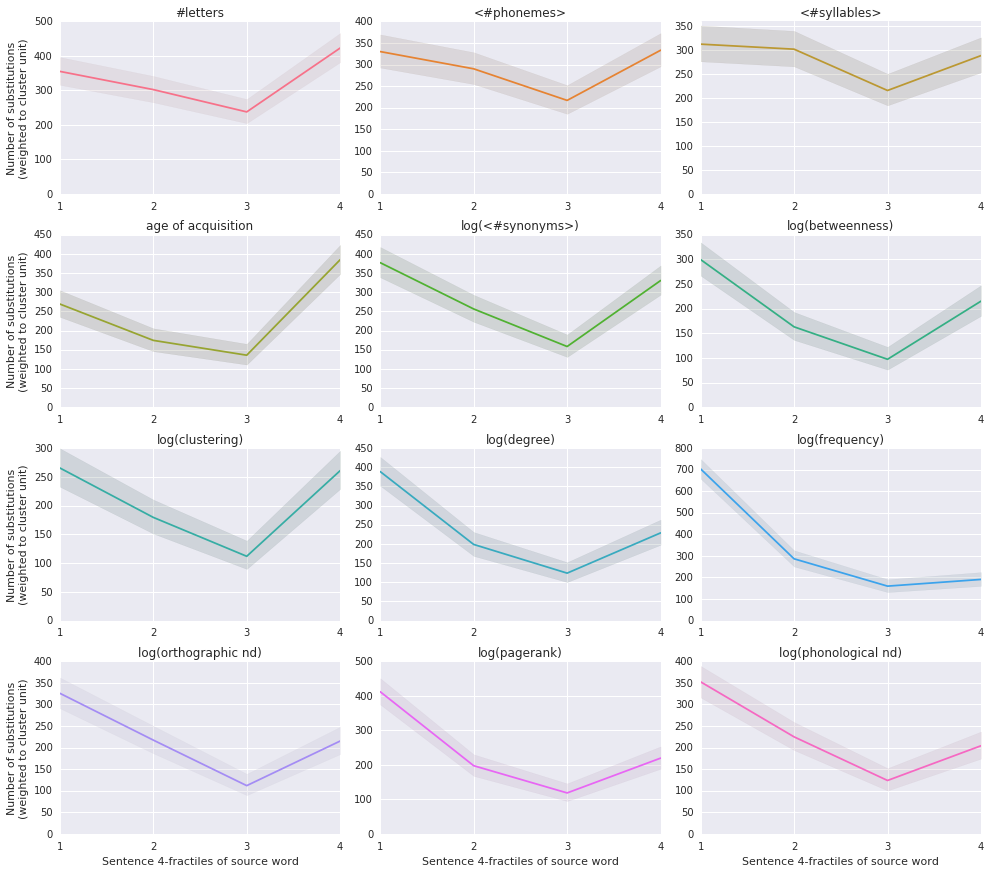

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

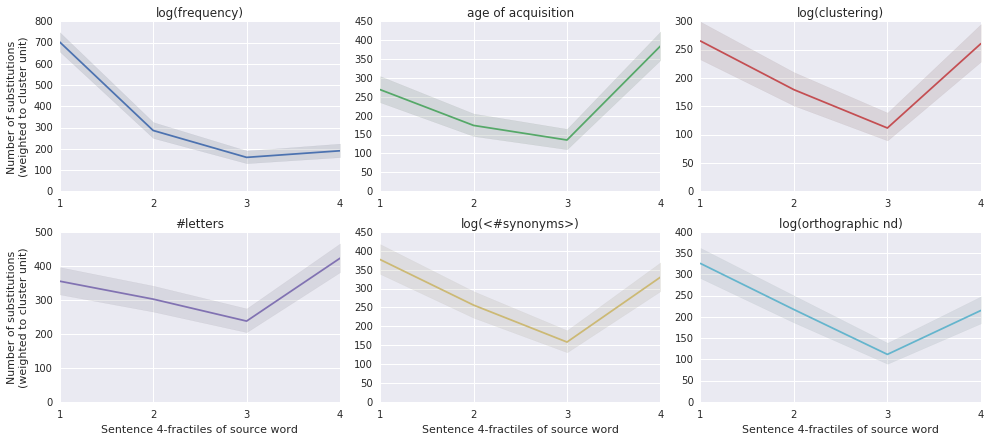

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)